In [1]:
from glob import glob
from pathlib import Path
import os
import re
import pickle
import numpy as np
import matplotlib.pyplot as plt

In [2]:
#data = pickle.load(open("./chem_data/test_run_SO2_OH_on.pkl", mode="rb"))

In [3]:
# h2so4 = np.tile(data['H2SO4'], (1000,1)).transpose()
# so2 = np.tile(data['SO2'], (1000,1)).transpose()
# oh = np.tile(data['OH'], (1000,1)).transpose()

In [4]:
# np.savetxt("./chem_data/processed_output_so2/0000_simple_cond/aero_number_0001.txt", data['N'])
# np.savetxt("./chem_data/processed_output_so2/0000_simple_cond/POM_0001.txt", data['POM (aq)'])
# np.savetxt("./chem_data/processed_output_so2/0000_simple_cond/H2O_0001.txt", data['H2O (aq)'])
# np.savetxt("./chem_data/processed_output_so2/0000_simple_cond/H2SO4_0001.txt", h2so4)
# np.savetxt("./chem_data/processed_output_so2/0000_simple_cond/SO2_0001.txt", so2)
# np.savetxt("./chem_data/processed_output_so2/0000_simple_cond/OH_0001.txt", oh)
# np.savetxt("./chem_data/processed_output_so2/0000_simple_cond/SO4_0001.txt", data['SULFATE (aq)'])
# np.savetxt("./chem_data/processed_output_so2/0000_simple_cond/HSO4_0001.txt", data['BISULFATE (aq)'])
# np.savetxt("./chem_data/processed_output_so2/0000_simple_cond/H2SO4a_0001.txt", data['H2SO4 (aq)'])

In [5]:
# total_steps = train_steps
# old_ts = total_steps
# rollout_number = 0
# for dir in os.listdir(raw_data_path):
#     if dir == ".DS_Store":
#         continue
    
#     path = raw_data_path + dir
#     os.system(f"python -m chem_data.chemgns --action='prepare' --raw_data_path={path}  --preped_data_path={npz_path}")
    
#     rollout_folder = rollouts_path + "rollout" + str(rollout_number)
#     os.system(f"mkdir -p {rollout_folder}")
#     rollout_number += 1
    
#     if total_steps == train_steps:
#         os.system(f"python -m gns.train --data_path={npz_path} --model_path={model_path} --output_path={rollout_folder} -ntraining_steps={total_steps}")
#     else:
#         os.system(f"python -m gns.train --data_path={npz_path} --model_path={model_path} --output_path={rollout_folder} " +
#                   f"--model_file='model-{old_ts}.pt' --train_state_file='train_state-{old_ts}.pt' -ntraining_steps={total_steps}")
        
#     os.system(f"python -m gns.train --mode='rollout' --data_path={npz_path} --model_path={model_path} --output_path={rollout_folder} " +
#               f"--model_file='model-{total_steps}.pt' --train_state_file='train_state-{total_steps}.pt'")
#     os.system(f"python -m chem_data.chemgns --action='analyze' --rollout_data_path={rollout_folder}  --proc_data_path={rollout_dicts}")
    
#     old_ts = total_steps
#     total_steps += train_steps

In [6]:
# raw_data_path = "./chem_data/processed_output_some/"
# topredict_path = "./chem_data/to_predict"
# rollout_dicts = "./chem_data/proc_data"

# npz_path = "./gns/data/"
# model_path = "./gns/model/"
# rollouts_path = "./gns/output/"

# train_steps = 300

In [7]:
def make_predict(path):  
    feats = {}
    for file in Path(path).glob("*.txt"):
        feats = np.loadtxt(file)
        if len(feats.shape) > 1:
            np.savetxt(f"./chem_data/to_predict/{file.name}", feats[:2,:])
        else: 
            np.savetxt(f"./chem_data/to_predict/{file.name}", feats[:2])

In [ ]:
path = "./chem_data/processed_output_some/0001_simple_cond/"
make_predict(path)

In [ ]:
!python -m chem_data.chemgns --action='predict' --raw_data_path="./chem_data/to_predict"  --preped_data_path="./gns/prepared_topredict/"

In [ ]:
!python -m gns.train --mode="predict" --data_path="./gns/prepared_topredict/" --model_path="./gns/model/" --output_path="./gns/predicted_rollout" --model_file="model-300.pt" --train_state_file="train_state-300.pt"

# Check Results

In [8]:
import chem_data.analyze_results as ar

In [9]:
material_properties = ['BC', 'OC', 'aero_number']
particle_chems = ['H2O', 'SO4']
gases = ['H2SO4']

In [10]:
rollout_results = "./chem_data/proc_data/"

In [11]:
rollout_data = {}
for dir in os.listdir(rollout_results):
    if dir.startswith("."):  
        print(f"Skipping {dir}")
        continue

    path = rollout_results + dir
    rollout_data[dir] = ar.load_rollout_data(path)

Skipping .ipynb_checkpoints


In [12]:
rollout_data.keys()

dict_keys(['rep8', 'rep2', 'rep13', 'rep14', 'rep20', 'rep9', 'rep7', 'rep12', 'rep1', 'rep18', 'rep5', 'rep19', 'rep3', 'unnorm.pkl', 'ex0', 'rep16', 'rep4', 'rep6', 'rep10', 'rep11', 'rep17', 'rep15'])

In [13]:
rollout_data['ex0']['rollout_ex00_dict.pkl'].keys()

dict_keys(['loss', 'true_x', 'pred_x', 'mat_prop'])

In [14]:
loss_dict = {}
for k in rollout_data.keys():
    if k != 'unnorm.pkl':
        loss_dict[int(re.findall('[0-9]+', k)[0])] = float(rollout_data[k]['rollout_ex00_dict.pkl']['loss'])

In [15]:
losses = sorted(loss_dict.items())

In [19]:
losses

[(0, 0.0003151379060000181),
 (1, 3.206225665053353e-05),
 (2, 2.3472055545425974e-05),
 (3, 2.5309036573162302e-05),
 (4, 1.6744861568440683e-05),
 (5, 4.74333774036495e-06),
 (6, 1.8538099766374216e-06),
 (7, 1.1864426596730482e-06),
 (8, 1.0458526958245784e-05),
 (9, 0.0007234530639834702),
 (10, 2.4242137442342937e-05),
 (11, 5.519398200704018e-06),
 (12, 1.7151422071037814e-05),
 (13, 1.1809893294412177e-05),
 (14, 1.208367757499218e-05),
 (15, 8.12563826002588e-07),
 (16, 7.431076483044308e-06),
 (17, 2.3813239749870263e-05),
 (18, 3.997235035058111e-05),
 (19, 2.6082600015797652e-05),
 (20, 0.0001573110930621624)]

In [16]:
xs = [e*100+100 for e, _ in losses]
ys = [l for _, l in losses]

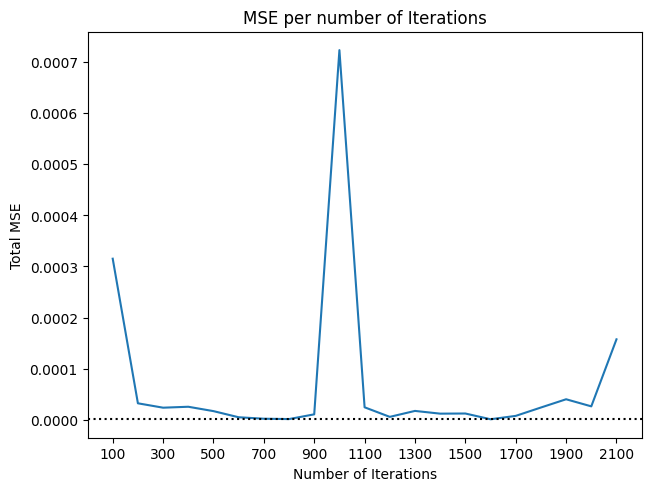

In [18]:
fig, ax = plt.subplots(layout='constrained')
ax.plot(xs, ys)
plt.axhline(y=min(ys), color="black", linestyle=":")
ax.set_xlabel('Number of Iterations')
ax.set_ylabel('Total MSE')
ax.set_title('MSE per number of Iterations')
plt.xticks(xs[::2])
plt.show()

In [20]:
ro = rollout_data['rep15']['rollout_ex00_dict.pkl']

In [21]:
true_x = ro['true_x']
pred_x = ro['pred_x']
mat_prop = ro['mat_prop']

In [22]:
true_x.keys()

dict_keys(['H2O', 'SO4', 'H2SO4'])

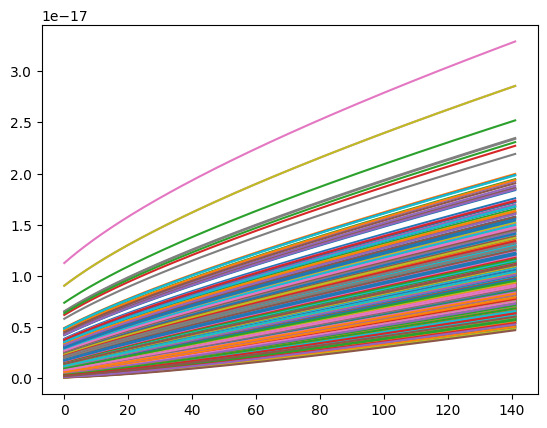

In [23]:
plt.plot(true_x['SO4'])
plt.show()

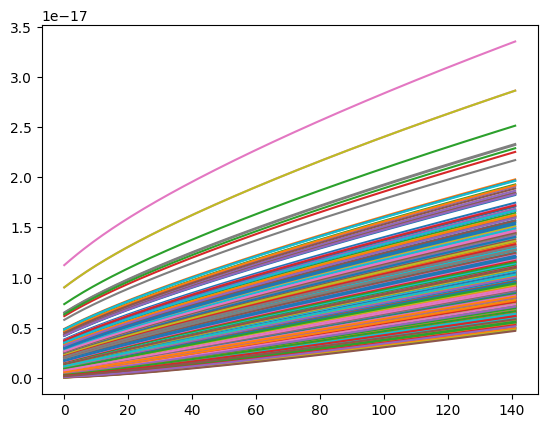

In [24]:
plt.plot(pred_x['SO4'])
plt.show()

In [25]:
ar.nmae(true_x['SO4'], pred_x['SO4'])

0.007092937514747574

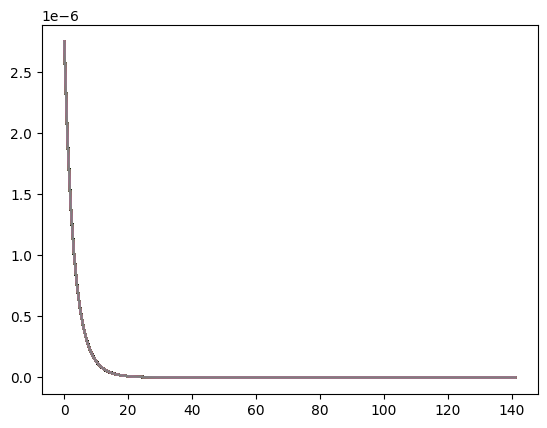

In [26]:
plt.plot(true_x['H2SO4'])
plt.show()

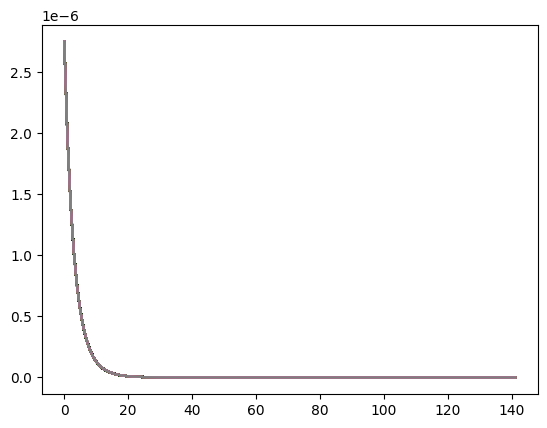

In [27]:
plt.plot(pred_x['H2SO4'])
plt.show()

In [28]:
ar.nmae(true_x['H2SO4'], pred_x['H2SO4'])

0.010683776936281357

In [29]:
true_dry_mass = {'BC': mat_prop['BC'], 'OC': mat_prop['OC'], 'SO4': true_x['SO4']}

In [30]:
pred_dry_mass = {'BC': mat_prop['BC'], 'OC': mat_prop['OC'], 'SO4': pred_x['SO4']}

In [31]:
so4_diam = ar.gd_from_vol(ar.volume('SO4', true_dry_mass))

In [32]:
pred_so4_diam = ar.gd_from_vol(ar.volume('SO4', pred_dry_mass))

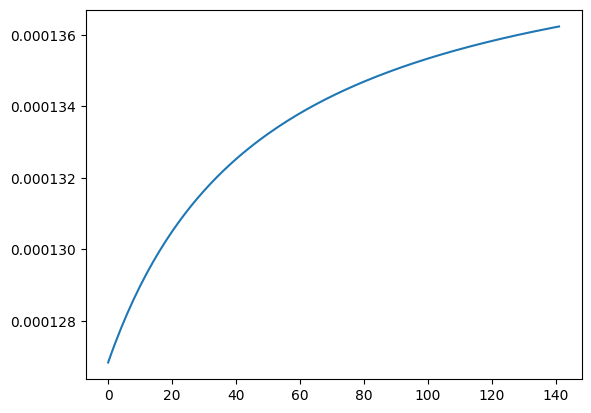

In [33]:
plt.plot(ar.mass_concentration(true_dry_mass, mat_prop['aero_number'], chem='all'))

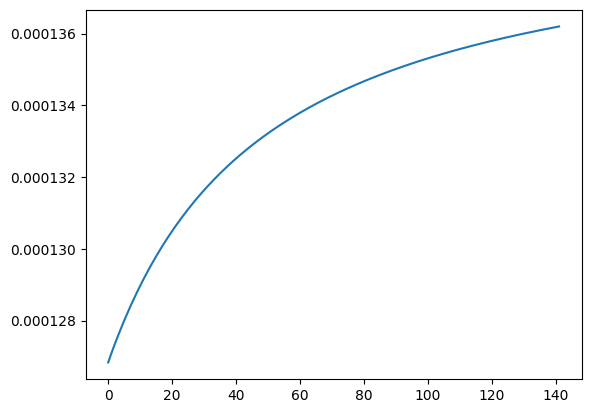

In [34]:
plt.plot(ar.mass_concentration(pred_dry_mass, mat_prop['aero_number'], chem='all'))

In [35]:
total_true_drymass = sum(true_dry_mass.values())

In [36]:
total_pred_drymass = sum(pred_dry_mass.values())

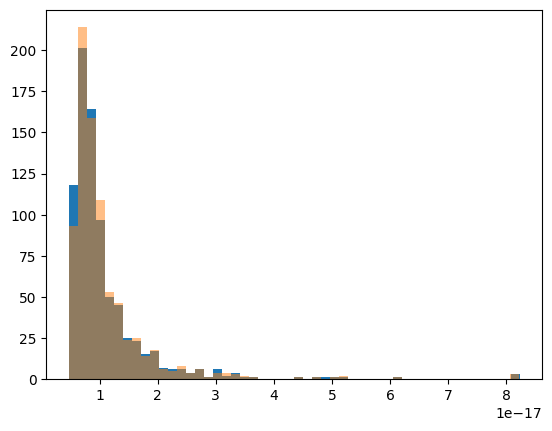

In [37]:
fig, ax = plt.subplots()
ax.hist(total_pred_drymass[-1,:], bins=50)
ax.hist(total_true_drymass[-1,:], bins=50, alpha=0.5)
plt.show()

In [38]:
mat_prop['aero_number'].shape

(142, 808)

In [39]:
dNdt = mat_prop['aero_number'][1:,:] - mat_prop['aero_number'][:-1,:]

In [40]:
true_Ddry = ar.gd_from_vol(ar.volume('SO4', true_dry_mass) + ar.volume('BC', true_dry_mass) + ar.volume('OC', true_dry_mass))

In [41]:
pred_Ddry = ar.gd_from_vol(ar.volume('SO4', pred_dry_mass) + ar.volume('BC', true_dry_mass) + ar.volume('OC', true_dry_mass))

In [42]:
true_dDdrydt = true_Ddry[1:,:] - true_Ddry[:-1,:]

In [43]:
pred_dDdrydt = pred_Ddry[1:,:] - pred_Ddry[:-1,:]

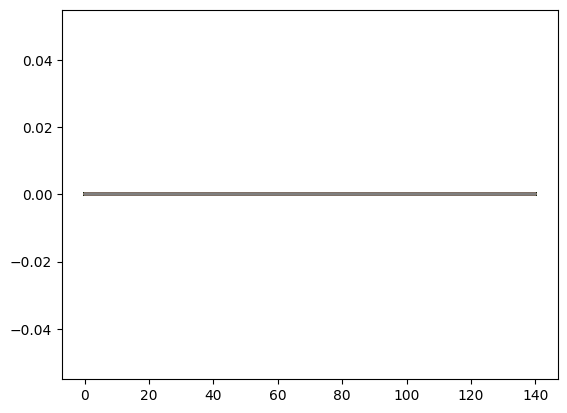

In [44]:
plt.plot(dNdt / pred_dDdrydt)
plt.show()

In [45]:
true_gmean, true_gstd = ar.mean_std_diameter(true_dry_mass)
pred_gmean, pred_gstd = ar.mean_std_diameter(pred_dry_mass)

In [46]:
diams = np.logspace(-9,-6, true_gmean.shape[0])

In [47]:
true_Ddry[-1,:].shape

(808,)

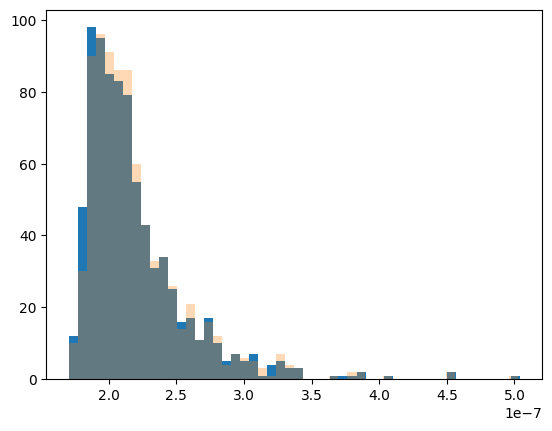

In [48]:
plt.hist(pred_Ddry[-1,:], bins=50)
plt.hist(true_Ddry[-1,:], bins=50, alpha=0.3)
plt.show()

In [49]:
def lognormal_distro(number_conc, diams, gmeans, gstds):
    return ((number_conc / (np.sqrt(2*np.pi) * np.log10(gstds))) * 
            np.exp(-0.5 * ((np.log10(diams) - np.log10(gmeans))**2 / (2 * np.log10(gstds)**2))))

In [50]:
true_nD = lognormal_distro(mat_prop['aero_number'], true_Ddry, true_gmean, true_gstd)
pred_nD = lognormal_distro(mat_prop['aero_number'], pred_Ddry, pred_gmean, pred_gstd)

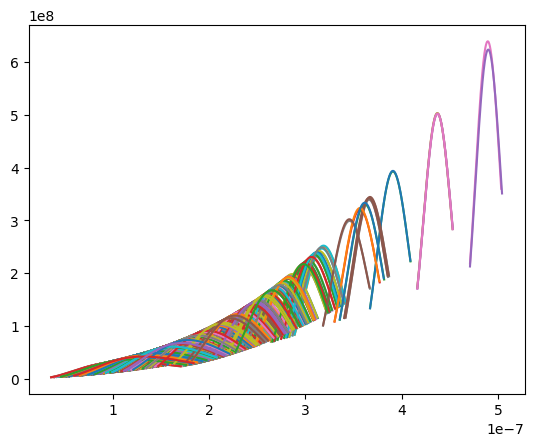

In [51]:
plt.plot(true_Ddry, true_nD)
plt.plot(pred_Ddry, pred_nD)
plt.show()

In [ ]:
# for i in range(0, true_drymass.shape[0], 10):
#     fig, ax = plt.subplots()
#     ax.hist(pred_drymass[i,:], bins=100)
#     ax.hist(true_drymass[i,:], bins=100, alpha=0.5)
#     plt.savefig(f"./figures/hists/hist{i}.png")
#     plt.close()